## V1535 Sco Brightness Temperature Work

In [1]:
#imports

import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_novas = (

["V392 Per",	3.40,    	0.78,			0.33,			"Gaia DR3 Parallax",			"2500 +/- 200",		"5500 +/- 300"],
["V1535 Sco",	7.79,	  	0.75,	        	0.69,			"Gaia DR3 Parallax",],
["V5589 Sgr",	8.04,		1.78,			1.35,			"Extinctions / Mass Model",					"4500 +/- 500"],
["RS Oph",		2.71,		0.2,			0.13,			"Gaia DR3 Parallax",],			
["V1534 Sco",	9.11,		2.14,			1.55,			"Extinctions/Colors/Mass Model",],
)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 
                                               'Distance Error (-)', 'Distance Source', "V1(km/s)",		"V2(km/s)"])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Distance Source,V1(km/s),V2(km/s)
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax,2500 +/- 200,5500 +/- 300
1,V1535 Sco,7.79,0.75,0.69,Gaia DR3 Parallax,None,None
2,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model,4500 +/- 500,None
3,RS Oph,2.71,0.20,0.13,Gaia DR3 Parallax,None,None
4,V1534 Sco,9.11,2.14,1.55,Extinctions/Colors/Mass Model,None,None


In [3]:
#data from V1535 Sco split into frequency

In [4]:

#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX #D

f1_26 = ([57187.2, 1.26, 0.277, 0.116], #BnA _> A
         [57158.3, 1.26, -0.152, 0.177], #B_> BnA
         [57143.3, 1.26, -0.0723, 0.106], #B
         [57130.35, 1.26, 0.444, 0.0813],
         [57120.57, 1.26, 0.873, 0.1], #B
         [57106.47, 1.26, 0.273, 0.112], #B
         [57091.4, 1.26, 0.153, 0.0738], #B
         [57082.5, 1.26, 0.0142, 0.101], #B
         [57072.5, 1.26, 1.57, 0.0765], #B
        )

f1_74 = ([57187.2, 1.74, -0.0505, 0.0776],#BnA _> A
         [57158.3, 1.74, 0.101, 0.0784],#B_> BnA
         [57143.3, 1.74, 0.165, 0.0711],
         [57130.35, 1.74, 0.258, 0.056],
         [57120.57, 1.74, 0.661, 0.0562],
         [57106.47, 1.74, 0.163, 0.0597],
         [57091.4, 1.74, 0.11, 0.0538],
         [57082.5, 1.74, 0.12, 0.0655],
         [57072.5, 1.74, 1.21, 0.0728],
        )

f4_55 = ([57360.7, 5, 0.0795, 0.031],#D
         [57187.2, 5, 0.0194, 0.0204],#BnA _> A
         [57158.3, 4.55, 0.0727, 0.023],#B_> BnA
         [57143.3, 4.55, 0.17, 0.0183],
         [57130.35, 4.55, 0.256, 0.0172],
         [57120.57, 4.55, 0.483, 0.0191],
         [57106.47, 4.55, 0.222, 0.0161],
         [57091.4, 4.55, 0.455, 0.0187],
         [57082.5, 4.55, 0.221, 0.0181],
         [57077.7, 4.87, 0.155, 0.0409], #VLBA
         [57072.5, 4.87, 0.484, 0.0505], #VLBA
         [57072.5, 4.55, 0.65, 0.0168],
         [57067.5, 4.55, 4.132, 0.0203],#B
        )

f7_38 = ([57360.7, 7, 0.0561, 0.022],#D
         [57187.2, 7, 0.044, 0.0223],#BnA _> A
         [57158.3, 7.38, 0.0708, 0.0171],#B_> BnA
         [57143.3, 7.38, 0.139, 0.0144],
         [57130.35, 7.38, 0.228, 0.0117],
         [57120.57, 7.38, 0.374, 0.0138],
         [57106.47, 7.38, 0.253, 0.012],
         [57091.4, 7.38, 0.536, 0.0136],
         [57082.5, 7.38, 0.192, 0.0157],
         [57072.5, 7.38, 0.439, 0.0126],
         [57067.5, 7.38, 2.786, 0.0128],
        )

f13_5 = ([57360.7, 13.5, -0.0000599, 0.0196],#D
         [57187.2, 13.5, 0.0587, 0.0157],#BnA _> A
         [57158.3, 13.5, 0.0518, 0.0175],#B_> BnA
         [57143.34, 13.5, 0.129, 0.0168], #B
         [57131.33, 13.5, 0.209, 0.0156], #B
         [57119.41, 13.5, 0.457, 0.0248], #B
         [57106.42, 13.5, 0.267, 0.0126], #B
         [57088.5, 13.5, 0.585, 0.0166], #B
         [57077.6, 13.5, 0.385, 0.0163], #B
         [57071.5, 13.5, 0.416, 0.0175], #B
        )

f17_4 = ([57360.7, 16.5, -0.000577, 0.0199],#D
         [57187.2, 16.5, 0.0569, 0.021],#BnA _> A
         [57158.3, 16.5, 0.0217, 0.0214],#B_> BnA
         [57143.34, 17.4, 0.164, 0.0216],
         [57131.33, 17.4, 0.167, 0.0221],
         [57119.41, 17.4, 0.399, 0.0182],
         [57106.42, 17.4, 0.299, 0.0143],
         [57088.5, 17.4, 0.755, 0.0207],
         [57077.6, 17.4, 0.456, 0.02],
         [57071.5, 17.4, 0.344, 0.0213],
        )

f28_2 = ([57360.7, 29.6, -0.0157, 0.051],#D
         [57187.2, 29.5, 0.13, 0.0446],#BnA _> A
         [57158.3, 29.5, 0.0401, 0.0362],#B_> BnA
         [57143.34, 28.2, 0.174, 0.0523],
         [57131.33, 28.2, 0.173, 0.0482],
         [57119.41, 28.2, 0.323, 0.0446],
         [57106.42, 28.2, 0.348, 0.0405],
         [57088.5, 28.2, 1.15, 0.0462],
         [57077.6, 28.2, 0.785, 0.0485],
         [57071.5, 28.2, 0.295, 0.0505],
         [57067.5, 28.2, 0.819, 0.0575],
        )

f36_5 = ([57360.7, 35, 0.0632, 0.0608],#D
         [57187.2, 35, -0.0206, 0.0588],#BnA _> A
         [57158.3, 35, -0.00361, 0.045],#B_> BnA
         [57143.34, 36.5, 0.0153, 0.0753],
         [57131.33, 36.5, 0.0395, 0.0833],
         [57119.41, 36.5, 0.276, 0.0602],
         [57106.42, 36.5, 0.186, 0.0551],
         [57088.5, 36.5, 1.68, 0.071],
         [57077.6, 36.5, 0.845, 0.0758],
         [57071.5, 36.5, 0.376, 0.0714],
         [57067.5, 36.5, 0.675, 0.0834],
        )


In [5]:
df1_26 =  pd.DataFrame(f1_26, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df1_74 =  pd.DataFrame(f1_74, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4_55 =  pd.DataFrame(f4_55, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7_38 =  pd.DataFrame(f7_38, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13_5 =  pd.DataFrame(f13_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df17_4 =  pd.DataFrame(f17_4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df28_2 =  pd.DataFrame(f28_2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df36_5 =  pd.DataFrame(f36_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [6]:
mask1 = df1_26['Flux Density (mJy)'] > 3 * np.sqrt(df1_26["Uncertainty (mJy)"]**2 + (df1_26["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask1.any():
        days1_26 = df1_26['MJD'][mask1] - 57064.837
        flux1_26 = df1_26["Flux Density (mJy)"][mask1]
        flux_err1_26 = np.sqrt(df1_26["Uncertainty (mJy)"][mask1]**2 + (df1_26["Flux Density (mJy)"][mask1]*0.05)**2)


mask1_1 = df1_74['Flux Density (mJy)'] > 3 * np.sqrt(df1_74["Uncertainty (mJy)"]**2 + (df1_74["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask1_1.any():
        days1_74 = df1_74['MJD'] - 57064.837
        flux1_74 = df1_74["Flux Density (mJy)"]
        flux_err1_74 = np.sqrt(df1_74["Uncertainty (mJy)"]**2 + (df1_74["Flux Density (mJy)"]*0.05)**2)


mask1_2 = df4_55['Flux Density (mJy)'] > 3 * np.sqrt(df4_55["Uncertainty (mJy)"]**2 + (df4_55["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask1_2.any():
        days4_55 = df4_55['MJD'] - 57064.837
        flux4_55 = df4_55["Flux Density (mJy)"]
        flux_err4_55 = np.sqrt(df4_55["Uncertainty (mJy)"]**2 + (df4_55["Flux Density (mJy)"]*0.05)**2)


mask2 = df7_38['Flux Density (mJy)'] > 3 * np.sqrt(df7_38["Uncertainty (mJy)"]**2 + (df7_38["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask2.any():
        days7_38 = df7_38['MJD'][mask2] - 57064.837
        flux7_38 = df7_38["Flux Density (mJy)"][mask2]
        flux_err7_38 = np.sqrt(df7_38["Uncertainty (mJy)"][mask2]**2 + (df7_38["Flux Density (mJy)"][mask2]*0.05)**2)

mask2_1 = df13_5['Flux Density (mJy)'] > 3 * np.sqrt(df13_5["Uncertainty (mJy)"]**2 + (df13_5["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask2_1.any():
    days13_5 = df13_5['MJD'] - 57064.837
    flux13_5 = df13_5["Flux Density (mJy)"]
    flux_err13_5 = np.sqrt(df13_5["Uncertainty (mJy)"]**2 + (df13_5["Flux Density (mJy)"]*0.1)**2)


mask3 = df17_4['Flux Density (mJy)'] > 3 * np.sqrt(df17_4["Uncertainty (mJy)"]**2 + (df17_4["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask3.any():
        days17_4 = df17_4['MJD'][mask3] - 57064.837
        flux17_4 = df17_4["Flux Density (mJy)"][mask3]
        flux_err17_4 = np.sqrt(df17_4["Uncertainty (mJy)"][mask3]**2 + (df17_4["Flux Density (mJy)"][mask3]*0.1)**2)

mask4 = df28_2['Flux Density (mJy)'] > 3 * np.sqrt(df28_2["Uncertainty (mJy)"]**2 + (df28_2["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask4.any():
        days28_2 = df28_2['MJD'][mask4] - 57064.837
        flux28_2 = df28_2["Flux Density (mJy)"][mask4]
        flux_err28_2 = np.sqrt(df28_2["Uncertainty (mJy)"][mask4]**2 + (df28_2["Flux Density (mJy)"][mask4]*0.1)**2)

mask4_1 = df36_5['Flux Density (mJy)'] > 3 * np.sqrt(df36_5["Uncertainty (mJy)"]**2 + (df36_5["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask4_1.any():
    days36_5 = df36_5['MJD'] - 57064.837
    flux36_5 = df36_5["Flux Density (mJy)"]
    flux_err36_5 = np.sqrt(df36_5["Uncertainty (mJy)"]**2 + (df36_5["Flux Density (mJy)"]*0.1)**2)

In [7]:

Dist =  7.79 * 3.086*10**21                 #distance in cm
V_const =  4782 * 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [8]:
nu0 = 1.26 #FREQUENCY 1
nu1 = 7.38 #frequency 2
nu2 = 17.4 #frequency 3
nu3 = 28.2 #frequency 4

date_CAC_sec_n0 = days1_26 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7_38 * 86400    #time in seconds 
date_CAC_sec_n2 = days17_4 * 86400    #time in seconds 
date_CAC_sec_n3 = days28_2 * 86400    #time in seconds 

In [9]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_26, date_CAC_sec_n0, flux_err1_26, nu0)

CTB_nu0

[228895.6158413113, 621868.961226394, 59157727.186450444]

In [10]:
CTB_nu1, CTBError_nu1 = Con_TB(flux7_38, date_CAC_sec_n1, flux_err7_38, nu1)

CTB_nu1

[522.7471445461825,
 1456.2060378658102,
 3426.2395026811714,
 7765.771467397494,
 9414.189882672681,
 48994.619665698076,
 39692.65381094686,
 482175.02832622966,
 25338250.463768322]

In [11]:
CTB_nu2, CTBError_nu2 = Con_TB(flux17_4, date_CAC_sec_n2, flux_err17_4, nu2)

CTB_nu2

[308.76169281697264,
 438.24471596337924,
 1554.4233488801997,
 2006.2803724952078,
 15644.418199398946,
 32479.652704515815,
 89902.31781934485]

In [12]:
CTB_nu3, CTBError_nu3 = Con_TB(flux28_2, date_CAC_sec_n3, flux_err28_2, nu3)

CTB_nu3

[124.7179872712486,
 172.84093233088348,
 479.0702670663349,
 888.9963134356522,
 9072.157586243326,
 21287.098552900385,
 29351.800166589055,
 510145.3371220413]

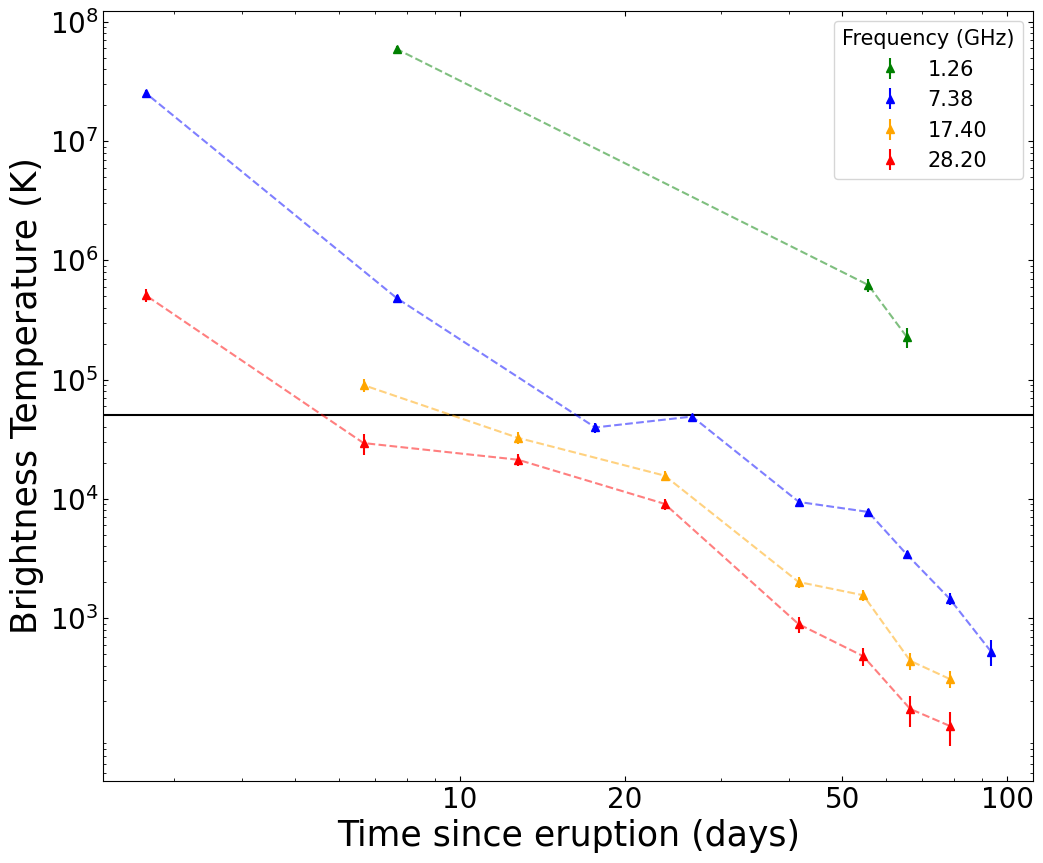

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

ax.errorbar(days1_26, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.26')
ax.plot(days1_26, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days7_38, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='7.38')
ax.plot(days7_38, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days17_4, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='17.40')
ax.plot(days17_4, CTB_nu2, color='orange', linestyle = '--', alpha=.50)

ax.errorbar(days28_2, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='red', label='28.20')
ax.plot(days28_2, CTB_nu3, color='red', linestyle = '--', alpha=.50)


ax.set_xscale('log')
ax.set_xticks([10,20,50,100], labels = ['10','20','50','100'], fontsize=20)
ax.set_yscale('log')
ax.set_yticks([1000, 10000, 100000, 1000000, 10000000, 100000000], labels = [r'$10^{3}$', r'$10^{4}$', r'$10^{5}$', r'$10^{6}$', r'$10^{7}$', r'$10^{8}$'],fontsize=20)
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("Brightness Temperature (K)", fontsize = 25)


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)', title_fontsize=15, fontsize=15)
plt.show();